In [ ]:
###-------------------------------------------------------------------------------------------------------------------
#         visualizing data and theoretical normal distribution curve
###-------------------------------------------------------------------------------------------------------------------
import csv
import numpy as np
from matplotlib.pyplot import (figure, title, subplot, plot, hist, show, ylabel, subplots, delaxes, subplots_adjust, legend, clf)
from scipy import stats

# norm. pdf negative log likelihood -> calculate it's fit and optimize with dynamic weights
# second model just do the same and weight the results of the norm.pdf's with the p(c) and p(c=1) 
# probabilities and take the according tbings of course

tuple_list = ((0,1), (0,2), (1,0), (2,0), (1,1), (1,2), (2,1), (2,2))

with open('Homework3pt1DataCSV.csv') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=' ')
    
    # Plot the histogram
    fig, axs = subplots(3,3, figsize=(10, 10))
    fig.tight_layout()
    fig.suptitle("Actual Data", fontsize=16)
    fig.subplots_adjust(top=0.88)
    
    for i, row in enumerate(csv_reader):
        row = [item for item in row if item != '']
        row = list(map(float, row)) 
        
        axs[tuple_list[i]].hist(row, bins=len(row), density=True)
        axs[tuple_list[i]].set_ylabel("Probability density")
        # Over the histogram, plot the theoretical probability distribution function:
        x = np.linspace(np.min(row), np.max(row), 1000)
        pdf = stats.norm.pdf(x,loc=np.mean(row),scale=np.std(row))
        axs[tuple_list[i]].plot(x,pdf,'.',color='red')
        
        
    delaxes(axs[0,0])
    subplots_adjust(wspace=0.3, hspace=0.2)
    axs[0,1].set_title("Light angle 0")
    axs[0,2].set_title("Light angle 30")
    axs[1,0].set_title("Sound angle 0")
    axs[2,0].set_title("Sound angle 30")

In [ ]:
###-------------------------------------------------------------------------------------------------------------------
#         function - plotting data with resulting model curves - stemming from the optimized parameters
###-------------------------------------------------------------------------------------------------------------------
def plot_curves(sol, name):
    figure
    w_0 = sol.x[5]**2 / (sol.x[4]**2 + sol.x[4]**2)


    mu_combined_sound_visual_0_0 = w_0 * sol.x[0] + (1 - w_0) * sol.x[2]
    sigma_combined_sound_visual_0_0 = w_0**2 * sol.x[4]**2 + (1 - w_0)**2 * sol.x[5]**2

    mu_combined_sound_visual_0_30 = w_0 * sol.x[0] + (1 - w_0) * sol.x[3]
    sigma_combined_sound_visual_0_30 = w_0**2 * sol.x[4]**2 + (1 - w_0)**2 * sol.x[5]**2

    mu_combined_sound_visual_30_0 = w_0 * sol.x[1] + (1 - w_0) * sol.x[2]
    sigma_combined_sound_visual_30_0 = w_0**2 * sol.x[4]**2 + (1 - w_0)**2 * sol.x[5]**2

    mu_combined_sound_visual_30_30 = w_0 * sol.x[1] + (1 - w_0) * sol.x[3]
    sigma_combined_sound_visual_30_30 = w_0**2 * sol.x[4]**2 + (1 - w_0)**2 * sol.x[5]**2


    mu_array = [sol.x[0], sol.x[1], sol.x[2], sol.x[3], 
                mu_combined_sound_visual_0_0, mu_combined_sound_visual_0_30,
                mu_combined_sound_visual_30_0, mu_combined_sound_visual_30_30]
    sigma_array = [sol.x[4], sol.x[4], sol.x[5], sol.x[5],
                  sigma_combined_sound_visual_0_0, sigma_combined_sound_visual_0_30,
                  sigma_combined_sound_visual_30_0, sigma_combined_sound_visual_30_30]


    tuple_list = ((0,1), (0,2), (1,0), (2,0), (1,1), (1,2), (2,1), (2,2))
    with open('Homework3pt1DataCSV.csv') as csvfile:
        csv_reader = csv.reader(csvfile, delimiter=' ')

        # plot the histogram
        fig, axs = subplots(3,3, figsize=(10, 10))
        fig.tight_layout()
        fig.suptitle(name, fontsize=16)
        fig.subplots_adjust(top=0.88)

        for i, row in enumerate(csv_reader):
            row = [item for item in row if item != '']
            row = list(map(float, row)) 

            axs[tuple_list[i]].hist(row, bins=len(row), density=True)
            axs[tuple_list[i]].set_ylabel("Probability density")
            # over the histogram, plot the theoretical probability distribution function:
            x = np.linspace(np.min(row), np.max(row), 1000)
            pdf = stats.norm.pdf(x,loc=mu_array[i],scale=sigma_array[i])
            axs[tuple_list[i]].plot(x,pdf,'.',color='red')

        delaxes(axs[0,0])
        subplots_adjust(wspace=0.3, hspace=0.2)
        axs[0,1].set_title("Light angle 0")
        axs[0,2].set_title("Light angle 30")
        axs[1,0].set_title("Sound angle 0")
        axs[2,0].set_title("Sound angle 30")

In [ ]:
###-------------------------------------------------------------------------------------------------------------------
#         functions - to be optimized - MLE and BCI model
###-------------------------------------------------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import csv
import numpy as np
from matplotlib.pyplot import (figure, title, subplot, plot, hist, show, ylabel, subplots, delaxes, subplots_adjust, legend, clf)
from scipy import stats
from scipy.stats import norm
import numpy as np
from scipy.optimize import minimize
import math

###-------------------------------------------------------------------------------------------------------------------
#         MLE model
###-------------------------------------------------------------------------------------------------------------------
def optimize_all_parameters(arguments):
    mu_sound_0, mu_sound_30 = arguments[0], arguments[1]
    mu_visual_0, mu_visual_30 = arguments[2], arguments[3]
    sigma_sound, sigma_visual = arguments[4], arguments[5]
    
    sum_log_pdf = 0
            
    # only sound
    if (index != 1):
        sum_log_pdf += sum(norm.logpdf(d.loc[:, "sound_0"], mu_sound_0, sigma_sound))
    if (index != 2):
        sum_log_pdf += sum(norm.logpdf(d.loc[:, "sound_30"], mu_sound_30, sigma_sound))

    # only visual
    if (index != 3):
        sum_log_pdf += sum(norm.logpdf(d.loc[:, "visual_0"], mu_visual_0, sigma_visual))
    if (index != 4):
        sum_log_pdf += sum(norm.logpdf(d.loc[:, "visual_30"], mu_visual_30, sigma_visual))

    # combined - 0
    w_0 = sigma_visual**2 / (sigma_sound**2 + sigma_visual**2)
    
    sigma_combined_sound_visual = w_0**2 * sigma_sound**2 + (1 - w_0)**2 * sigma_visual**2

    mu_combined_sound_visual_0_0 = w_0 * mu_sound_0 + (1 - w_0) * mu_visual_0

    mu_combined_sound_visual_0_30 = w_0 * mu_sound_0 + (1 - w_0) * mu_visual_30

    mu_combined_sound_visual_30_0 = w_0 * mu_sound_30 + (1 - w_0) * mu_visual_0

    mu_combined_sound_visual_30_30 = w_0 * mu_sound_30 + (1 - w_0) * mu_visual_30

    if (index != 5):
        sum_log_pdf += sum(norm.logpdf(d.loc[:, "sound_visual_0_0"], mu_combined_sound_visual_0_0, sigma_combined_sound_visual))
    if (index != 6):
        sum_log_pdf += sum(norm.logpdf(d.loc[:, "sound_visual_0_30"], mu_combined_sound_visual_0_30, sigma_combined_sound_visual))
    if (index != 7):
        sum_log_pdf += sum(norm.logpdf(d.loc[:, "sound_visual_30_0"], mu_combined_sound_visual_30_0, sigma_combined_sound_visual))
    if (index != 8):
        sum_log_pdf += sum(norm.logpdf(d.loc[:, "sound_visual_30_30"], mu_combined_sound_visual_30_30, sigma_combined_sound_visual))
    
    return -sum_log_pdf



###-------------------------------------------------------------------------------------------------------------------
#         BCI model
###-------------------------------------------------------------------------------------------------------------------
def optimize_all_parameters_bci(arguments):
    mu_sound_0, mu_sound_30 = arguments[0], arguments[1]
    mu_visual_0, mu_visual_30 = arguments[2], arguments[3]
    sigma_sound, sigma_visual = arguments[4], arguments[5]
    c =  arguments[6]
    
    sum_log_pdf = 0
    
    p_c = 1/(1 + math.exp(-c))
    
    # only sound
    if (index != 1):
        sum_log_pdf += sum(norm.logpdf(d.loc[:, "sound_0"], mu_sound_0, sigma_sound))
    if (index != 2):
        sum_log_pdf += sum(norm.logpdf(d.loc[:, "sound_30"], mu_sound_30, sigma_sound))
        
    # only visual
    if (index != 3):
        sum_log_pdf += sum(norm.logpdf(d.loc[:, "visual_0"], mu_visual_0, sigma_visual))
    if (index != 4):
        sum_log_pdf += sum(norm.logpdf(d.loc[:, "visual_30"], mu_visual_30, sigma_visual))
    
    
    w_0 = sigma_visual ** 2 / (sigma_sound ** 2 + sigma_visual ** 2)
        
    sigma_combined_sound_visual = w_0**2 * sigma_sound**2 + (1 - w_0)**2 * sigma_visual**2

    mu_combined_sound_visual_0_0 = w_0 * mu_sound_0 + (1 - w_0) * mu_visual_0

    mu_combined_sound_visual_0_30 = w_0 * mu_sound_0 + (1 - w_0) * mu_visual_30

    mu_combined_sound_visual_30_0 = w_0 * mu_sound_30 + (1 - w_0) * mu_visual_0

    mu_combined_sound_visual_30_30 = w_0 * mu_sound_30 + (1 - w_0) * mu_visual_30
    
    # CONFUSED (EITHER OUTCOMENTET OR COMMENTED)
    if (index != 5):
        s_v_0_0 = norm.pdf(d.loc[:, "sound_visual_0_0"], mu_combined_sound_visual_0_0, sigma_combined_sound_visual)
        s_0 = norm.pdf(d.loc[:, "sound_visual_0_0"], mu_sound_0, sigma_sound)
        sum_log_pdf += sum(np.log(s_v_0_0 * p_c + s_0 * (1 - p_c)))
    
    if (index != 6):
        s_v_0_30 = norm.pdf(d.loc[:, "sound_visual_0_30"], mu_combined_sound_visual_0_30, sigma_combined_sound_visual)
        s_0 = norm.pdf(d.loc[:, "sound_visual_0_30"], mu_sound_0, sigma_sound)
        sum_log_pdf += sum(np.log(s_v_0_30 * p_c + s_0 * (1 - p_c)))
    
    if (index != 7):
        s_v_30_0 = norm.pdf(d.loc[:, "sound_visual_30_0"], mu_combined_sound_visual_30_0, sigma_combined_sound_visual)
        s_30 = norm.pdf(d.loc[:, "sound_visual_30_0"], mu_sound_30, sigma_sound)
        sum_log_pdf += sum(np.log(s_v_30_0 * p_c + s_30 * (1 - p_c)))
    
    if (index != 8):
        s_v_30_30 = norm.pdf(d.loc[:, "sound_visual_30_30"], mu_combined_sound_visual_30_30, sigma_combined_sound_visual)
        s_30 = norm.pdf(d.loc[:, "sound_visual_30_30"], mu_sound_30, sigma_sound)
        sum_log_pdf += sum(np.log(s_v_30_30 * p_c + s_30 * (1 - p_c)))
            
    return -sum_log_pdf
            

In [ ]:
def optimize_all_parameters_cv_eval(fold_df):
    neg_log_results = []

    for idx, item in fold_df.iterrows():
    
        if (idx + 1 == 1):
            neg_log_results.append(-sum(norm.logpdf(d.loc[:, "sound_0"], fold_df.iloc[idx].mu_sound_0, fold_df.iloc[idx].sigma_sound)))
        if (idx + 1 == 2):
            neg_log_results.append(-sum(norm.logpdf(d.loc[:, "sound_30"], fold_df.iloc[idx].mu_sound_30, fold_df.iloc[idx].sigma_sound)))
        
        if (idx + 1 == 3):
            neg_log_results.append(-sum(norm.logpdf(d.loc[:, "visual_0"], fold_df.iloc[idx].mu_visual_0, fold_df.iloc[idx].sigma_visual)))
        if (idx + 1 == 4):
            neg_log_results.append(-sum(norm.logpdf(d.loc[:, "visual_30"], fold_df.iloc[idx].mu_visual_30, fold_df.iloc[idx].sigma_visual)))

        w_0 = fold_df.iloc[idx].sigma_visual ** 2 / (fold_df.iloc[idx].sigma_sound ** 2 + fold_df.iloc[idx].sigma_visual ** 2)
        
        sigma_combined_sound_visual = w_0**2 * fold_df.iloc[idx].sigma_sound**2 + (1 - w_0)**2 * fold_df.iloc[idx].sigma_visual**2

        mu_combined_sound_visual_0_0 = w_0 * fold_df.iloc[idx].mu_sound_0 + (1 - w_0) * fold_df.iloc[idx].mu_visual_0

        mu_combined_sound_visual_0_30 = w_0 * fold_df.iloc[idx].mu_sound_0 + (1 - w_0) * fold_df.iloc[idx].mu_visual_30

        mu_combined_sound_visual_30_0 = w_0 * fold_df.iloc[idx].mu_sound_30 + (1 - w_0) * fold_df.iloc[idx].mu_visual_0

        mu_combined_sound_visual_30_30 = w_0 * fold_df.iloc[idx].mu_sound_30 + (1 - w_0) * fold_df.iloc[idx].mu_visual_30

        if (idx + 1 == 5):
            neg_log_results.append(-sum(norm.logpdf(d.loc[:, "sound_visual_0_0"], mu_combined_sound_visual_0_0, sigma_combined_sound_visual)))
        if (idx + 1 == 6):
            neg_log_results.append(-sum(norm.logpdf(d.loc[:, "sound_visual_0_30"], mu_combined_sound_visual_0_30, sigma_combined_sound_visual)))
        if (idx + 1 == 7):
            neg_log_results.append(-sum(norm.logpdf(d.loc[:, "sound_visual_30_0"], mu_combined_sound_visual_30_0, sigma_combined_sound_visual)))
        if (idx + 1 == 8):
            neg_log_results.append(-sum(norm.logpdf(d.loc[:, "sound_visual_30_30"], mu_combined_sound_visual_30_30, sigma_combined_sound_visual)))

    return neg_log_results


def optimize_all_parameters_bci_cv_eval(fold_df):
    neg_log_results = []

    for idx, item in fold_df.iterrows():

        p_c = 1/(1 + math.exp(-fold_df.iloc[idx].c))

        # only sound
        if (idx + 1 == 1):
            neg_log_results.append(-sum(norm.logpdf(d.loc[:, "sound_0"], fold_df.iloc[idx].mu_sound_0, fold_df.iloc[idx].sigma_sound)))
        if (idx + 1 == 2):
            neg_log_results.append(-sum(norm.logpdf(d.loc[:, "sound_30"], fold_df.iloc[idx].mu_sound_30, fold_df.iloc[idx].sigma_sound)))

        # only visual
        if (idx + 1 == 3):
            neg_log_results.append(-sum(norm.logpdf(d.loc[:, "visual_0"], fold_df.iloc[idx].mu_visual_0, fold_df.iloc[idx].sigma_visual)))
        if (idx + 1 == 4):
            neg_log_results.append(-sum(norm.logpdf(d.loc[:, "visual_30"], fold_df.iloc[idx].mu_visual_30, fold_df.iloc[idx].sigma_visual)))

        w_0 = fold_df.iloc[idx].sigma_visual ** 2 / (fold_df.iloc[idx].sigma_sound ** 2 + fold_df.iloc[idx].sigma_visual ** 2)

        sigma_combined_sound_visual = w_0**2 * fold_df.iloc[idx].sigma_sound**2 + (1 - w_0)**2 * fold_df.iloc[idx].sigma_visual**2

        mu_combined_sound_visual_0_0 = w_0 * fold_df.iloc[idx].mu_sound_0 + (1 - w_0) * fold_df.iloc[idx].mu_visual_0

        mu_combined_sound_visual_0_30 = w_0 * fold_df.iloc[idx].mu_sound_0 + (1 - w_0) * fold_df.iloc[idx].mu_visual_30

        mu_combined_sound_visual_30_0 = w_0 * fold_df.iloc[idx].mu_sound_30 + (1 - w_0) * fold_df.iloc[idx].mu_visual_0

        mu_combined_sound_visual_30_30 = w_0 * fold_df.iloc[idx].mu_sound_30 + (1 - w_0) * fold_df.iloc[idx].mu_visual_30

        if (idx + 1 == 5):
            s_v_0_0 = norm.pdf(d.loc[:, "sound_visual_0_0"], mu_combined_sound_visual_0_0, sigma_combined_sound_visual)
            # s_0 = sum(norm.logpdf(d.loc[:, "sound_0"], mu_sound_0, sigma_sound))
            s_0 = norm.pdf(d.loc[:, "sound_visual_0_0"], fold_df.iloc[idx].mu_sound_0, fold_df.iloc[idx].sigma_sound)
            neg_log_results.append(-sum(np.log(s_v_0_0 * p_c + s_0 * (1 - p_c))))

        if (idx + 1 == 6):
            s_v_0_30 = norm.pdf(d.loc[:, "sound_visual_0_30"], mu_combined_sound_visual_0_30, sigma_combined_sound_visual)
            #s_0 = sum(norm.logpdf(d.loc[:, "sound_0"], mu_sound_0, sigma_sound))
            s_0 = norm.pdf(d.loc[:, "sound_visual_0_30"], fold_df.iloc[idx].mu_sound_0, fold_df.iloc[idx].sigma_sound)
            neg_log_results.append(-sum(np.log(s_v_0_30 * p_c + s_0 * (1 - p_c))))

        if (idx + 1 == 7):
            s_v_30_0 = norm.pdf(d.loc[:, "sound_visual_30_0"], mu_combined_sound_visual_30_0, sigma_combined_sound_visual)
            #s_30 = sum(norm.logpdf(d.loc[:, "sound_30"], mu_sound_30, sigma_sound))
            s_30 = norm.pdf(d.loc[:, "sound_visual_30_0"], fold_df.iloc[idx].mu_sound_30, fold_df.iloc[idx].sigma_sound)
            neg_log_results.append(-sum(np.log(s_v_30_0 * p_c + s_30 * (1 - p_c))))

        if (idx + 1 == 8):
            s_v_30_30 = norm.pdf(d.loc[:, "sound_visual_30_30"], mu_combined_sound_visual_30_30, sigma_combined_sound_visual)
            #s_30 = sum(norm.logpdf(d.loc[:, "sound_30"], mu_sound_30, sigma_sound))
            s_30 = norm.pdf(d.loc[:, "sound_visual_30_30"], fold_df.iloc[idx].mu_sound_30, fold_df.iloc[idx].sigma_sound)
            neg_log_results.append(-sum(np.log(s_v_30_30 * p_c + s_30 * (1 - p_c))))

    return neg_log_results



In [ ]:
###-------------------------------------------------------------------------------------------------------------------
#         importing data CV MLE
###-------------------------------------------------------------------------------------------------------------------
x_folds = []
index = 1
folds = 8
plots = []
for i in range(folds):
    headers = ["sound_0", "sound_30", "visual_0", "visual_30",
               "sound_visual_0_0", "sound_visual_0_30", "sound_visual_30_0", "sound_visual_30_30"]

    d = pd.DataFrame()
    with open('Homework3pt1DataCSV.csv') as csvfile:
        csv_reader = csv.reader(csvfile, delimiter=' ')
        for i, row in enumerate(csv_reader):
            row = [item for item in row if item != '']
            row = list(map(float, row))
            d[headers[i]] = row

    x = [
        np.mean(d.loc[:, "sound_0"]),
        np.mean(d.loc[:, "sound_30"]),
        np.mean(d.loc[:, "visual_0"]),
        np.mean(d.loc[:, "visual_30"]),
        (np.std(d.loc[:, "sound_0"]) + np.std(d.loc[:, "sound_30"])) / 2,
        (np.std(d.loc[:, "visual_0"]) + np.std(d.loc[:, "visual_30"])) / 2,
    ]

    ###-------------------------------------------------------------------------------------------------------------------
    #         optimizing parameters for NLE model
    ###-------------------------------------------------------------------------------------------------------------------
    sol = minimize(optimize_all_parameters, x, method="Nelder-Mead", options={"maxiter": 10000})
    plots.append(plot_curves(sol, "MLE MODEL", index - 1))

    # print(sol.fun)
    x_folds.append(sol.x)

    index = index + 1

mle_cv_df = pd.DataFrame(x_folds, columns=[
    'mu_sound_0',
    'mu_sound_30',
    'mu_visual_0',
    'mu_visual_30',
    'sigma_sound',
    'sigma_visual',
])

print("Validation score: ", sum(optimize_all_parameters_cv_eval(mle_cv_df)))

In [ ]:
###-------------------------------------------------------------------------------------------------------------------
#         importing data CV MLE
###-------------------------------------------------------------------------------------------------------------------
x_folds = []
index = 1
folds = 8
for i in range(folds):
    headers = ["sound_0", "sound_30", "visual_0", "visual_30",
               "sound_visual_0_0", "sound_visual_0_30", "sound_visual_30_0", "sound_visual_30_30"]

    d = pd.DataFrame()
    with open('Homework3pt1DataCSV.csv') as csvfile:
        csv_reader = csv.reader(csvfile, delimiter=' ')
        for i, row in enumerate(csv_reader):
            row = [item for item in row if item != '']
            row = list(map(float, row))
            d[headers[i]] = row

    x = [
        np.mean(d.loc[:, "sound_0"]),
        np.mean(d.loc[:, "sound_30"]),
        np.mean(d.loc[:, "visual_0"]),
        np.mean(d.loc[:, "visual_30"]),
        (np.std(d.loc[:, "sound_0"]) + np.std(d.loc[:, "sound_30"])) / 2,
        (np.std(d.loc[:, "visual_0"]) + np.std(d.loc[:, "visual_30"])) / 2,
    ]

    ###-------------------------------------------------------------------------------------------------------------------
    #         optimizing parameters for BCI model
    ###-------------------------------------------------------------------------------------------------------------------
    x.append(0.1)

    sol = minimize(optimize_all_parameters_bci, x, method="Nelder-Mead", options={"maxiter": 10000})
    # plot_curves(sol, "MLE MODEL")

    print(sol.fun)
    x_folds.append(sol.x)

    index = index + 1

bci_cv_df = pd.DataFrame(x_folds, columns=[
    'mu_sound_0',
    'mu_sound_30',
    'mu_visual_0',
    'mu_visual_30',
    'sigma_sound',
    'sigma_visual',
    'c'
])

print("Validation score: ", sum(optimize_all_parameters_bci_cv_eval(bci_cv_df)))

In [ ]:
# I guess for each stimuli we will have one probability value in one of the arrays
def scatter_plot(model_probabilities, subject_probabilities):
    plt.scatter(model_probabilities, subject_probabilities)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import binom

###-------------------------------------------------------------------------------------------------------------------
#         Part 2 - MLE
# change it so that the sigmoid function - is the function above it and the parameters inside are as before 
###-------------------------------------------------------------------------------------------------------------------

###-------------------------------------------------------------------------------------------------------------------
#         Preparing data 
###-------------------------------------------------------------------------------------------------------------------

headers = ["d_b_sound", "d_b_visual", "1_visual_d_b_sound", "2_visual_d_b_sound", 
               "3_visual_d_b_sound", "4_visual_d_b_sound", "5_visual_d_b_sound"]

patients = ["Homework3pt2DataCSV1", "Homework3pt2DataCSV2", "Homework3pt2DataCSV3", 
            "Homework3pt2DataCSV4", "Homework3pt2DataCSV5"]

###-------------------------------------------------------------------------------------------------------------------
#         Iterating through each Patient
###-------------------------------------------------------------------------------------------------------------------

for i in range(0, len(patients)):
    data_frame = pd.DataFrame()
    k = 0
    with open(patients[i] + '.csv') as csvfile:
        csv_reader = csv.reader(csvfile, delimiter=' ')
        for row in enumerate(csv_reader):
            row = [item for item in row if item != '']
            row = list(filter(None, row[1]))
            row = list(map(float, row))
            data_frame[headers[k]] = row
            k += 1
            
    ###-------------------------------------------------------------------------------------------------------------------
    #         Optimize MLE model for each Patient
    ###-------------------------------------------------------------------------------------------------------------------
    current_fold = 1
    num_of_folds = 35
    patient_cv = []
    while (current_fold <= num_of_folds):
        x = [
             np.std(data_frame.loc[:, "d_b_sound"]),
             1,
             np.std(data_frame.loc[:, "d_b_visual"]),
             1
        ]
        sol = minimize(optimize_early_mle, x)#, method="Nelder-Mead")
        patient_cv.append(sol.x)
        current_fold += 1

    neg_log, p, p_a, p_v = optimize_early_mle_cv_eval(patient_cv)

    print('Early MLE - Observer ', i)
    print("Negative log prob: ", sum(neg_log))
    print("p_value: ", p)
    print("p_a_value: ", p_a)
    print("p_v_value: ", p_v)
    
    

    ###-------------------------------------------------------------------------------------------------------------------
    #         Optimize BCI model for each Patient
    ###-------------------------------------------------------------------------------------------------------------------
    current_fold = 1
    num_of_folds = 35
    patient_cv = []
    while (current_fold <= num_of_folds):
        x = [
             np.std(data_frame.loc[:, "d_b_sound"]),
             1,
             np.std(data_frame.loc[:, "d_b_visual"]),
             1,
             10
        ]
        sol = minimize(optimize_early_bci, x)
        patient_cv.append(sol.x)
        current_fold += 1
    
    neg_log, p, p_a, p_v = optimize_early_bci_cv_eval(patient_cv)

    print("Early BCI - Observer ", i)
    print("Negative log prob: ", sum(neg_log))
    print("p_value: ", p)
    print("p_a_value: ", p_a)
    print("p_v_value: ", p_v)

    

    # ##-------------------------------------------------------------------------------------------------------------------
    #         Optimize PROP MATCH Model for each Patient
    # ##-------------------------------------------------------------------------------------------------------------------
    current_fold = 1
    num_of_folds = 35
    patient_cv = []
    while (current_fold <= num_of_folds):
        x = [
            0.5,
            0.5,
            0.5,
            0.5,
            0.5,
            0.5,
            0.5,
            0.5,
            0.5,
            0.5
        ]
        sol = minimize(prob_matching_model, x)
        patient_cv.append(sol.x)
        current_fold += 1

    
    neg_log, p, p_a, p_v = prob_matching_model_cv_eval(patient_cv)

    print("Prob Matching - Observer ", i)
    print("sol.x: ", sol.x)
    print("Negative log prob: ", sum(neg_log))
    print(1/(1 + np.exp(-sol.x)))
    print("p_value: ", p)
    print("p_a_value: ", p_a)
    print("p_v_value: ", p_v)
    print('\n')

    # ##-------------------------------------------------------------------------------------------------------------------
    #         Optimize PROP MATCH BCI Model for each Patient
    # ##-------------------------------------------------------------------------------------------------------------------
    current_fold = 1
    num_of_folds = 35
    patient_cv = []
    while (current_fold <= num_of_folds):
        x = [
            0.5,
            0.5,
            0.5,
            0.5,
            0.5,
            0.5,
            0.5,
            0.5,
            0.5,
            0.5,
            20
        ]
        sol = minimize(prob_matching_model_c, x)
        patient_cv.append(sol.x)
        current_fold += 1
    
    neg_log, p, p_a, p_v = prob_matching_model_c_cv_eval(patient_cv)

    print("Prob Matching BCI - Observer ", i)
    print("sol.x: ", sol.x)
    print("Negative log prob: ", sum(neg_log))
    print("p_value: ", p)
    print("p_a_value: ", p_a)
    print("p_v_value: ", p_v)
    print('\n')


    # ##-------------------------------------------------------------------------------------------------------------------
    #         Optimize GAUSSIAN LATE MLE model for each Patient
    # ##-------------------------------------------------------------------------------------------------------------------

    current_fold = 1
    num_of_folds = 35
    patient_cv = []
    while (current_fold <= num_of_folds):
        x = [
            np.std(data_frame.loc[:, "d_b_sound"]),
            1,
            np.std(data_frame.loc[:, "d_b_visual"]),
            1
        ]
        sol = minimize(gaussian_late_mle_model, x)#, bounds = bounds)#, method="Powell")
        patient_cv.append(sol.x)
        current_fold += 1

    neg_log, p, p_a, p_v = gaussian_late_mle_model_cv_eval(patient_cv)

    print("GAUSSIAN LATE MLE - Observer ", i+1)
    print("Negative log prob: ", sum(neg_log))
    print("p_value: ", p)
    print("p_a_value: ", p_a)
    print("p_v_value: ", p_v)
    print('\n')

    # ##-------------------------------------------------------------------------------------------------------------------
    #         Optimize GAUSSIAN LATE MLE BCI model for each Patient
    # ##-------------------------------------------------------------------------------------------------------------------
    current_fold = 1
    num_of_folds = 35
    patient_cv = []
    while (current_fold <= num_of_folds):
        x = [
            np.std(data_frame.loc[:, "d_b_sound"]),
            1,
            np.std(data_frame.loc[:, "d_b_visual"]),
            1,
            0
        ]
        sol = minimize(gaussian_late_mle_model_c, x)#, bounds = bounds)#, method="Powell")
        patient_cv.append(sol.x)
        current_fold += 1

    neg_log, p, p_a, p_v = gaussian_late_mle_model_c_cv_eval(patient_cv)

    print("GAUSSIAN LATE MLE - Observer ", i+1)
    print("Negative log prob: ", sum(neg_log))
    print("p_value: ", p)
    print("p_a_value: ", p_a)
    print("p_v_value: ", p_v)
    print('\n')


    

In [ ]:
###-------------------------------------------------------------------------------------------------------------------
#         EARLY MLE model
###-------------------------------------------------------------------------------------------------------------------
def optimize_early_mle(arguments): 
    sigma_a, c_a, sigma_v, c_v = arguments[0], arguments[1], arguments[2], arguments[3]
    log_error_sum = 0
    N = 24
    
    ###-------------------------------------------------------------------------------------------------------------------
    #         combined sigma and weight 
    ###-------------------------------------------------------------------------------------------------------------------
    w_0 = sigma_v ** 2 / (sigma_a ** 2 + sigma_v ** 2)
    sigma_combined_a_v = np.sqrt((w_0 ** 2) * (sigma_a ** 2) + ((1 - w_0) ** 2) * (sigma_v ** 2))
    
    ###-------------------------------------------------------------------------------------------------------------------
    #         intensity preparation
    ###----------------------------------------------------------------------------------------------------------------
    intensities = [1, 2, 3, 4, 5]
    
    v_s_intensities = np.vstack([
        data_frame.loc[:, "1_visual_d_b_sound"],
        data_frame.loc[:, "2_visual_d_b_sound"],
        data_frame.loc[:, "3_visual_d_b_sound"],
        data_frame.loc[:, "4_visual_d_b_sound"],
        data_frame.loc[:, "5_visual_d_b_sound"]
    ])
    
    for i, j in enumerate(intensities):
        if (current_fold <=5):
            if ((i + 1) != current_fold):
                n_a = int(data_frame.loc[:, "d_b_sound"][i])
                p_a = norm.cdf((j - c_a) / sigma_a)
                log_error_sum += stats.binom.logpmf(n_a, N, p_a)
        else:
            n_a = int(data_frame.loc[:, "d_b_sound"][i])
            p_a = norm.cdf((j - c_a) / sigma_a)
            log_error_sum += stats.binom.logpmf(n_a, N, p_a)
        if (5 < current_fold <= 10):
            if ((i + 6) != current_fold):
                n_v = int(data_frame.loc[:, "d_b_visual"][i])
                p_v = norm.cdf((j - c_v) / sigma_v)
                log_error_sum += stats.binom.logpmf(n_v, N, p_v)
        else:
            n_v = int(data_frame.loc[:, "d_b_visual"][i])
            p_v = norm.cdf((j - c_v) / sigma_v)
            log_error_sum += stats.binom.logpmf(n_v, N, p_v)

    for i, v in enumerate(intensities):
        for j, a in enumerate(intensities):
            if (10 < current_fold <= 35):
                if (((i*5)+11+j) != current_fold):
                    n = int(v_s_intensities[i][j])
                    I_a = a - c_a
                    I_v = v - c_v
                    I_a_v = w_0 * I_a + (1 - w_0) * I_v                                                           
                    p = norm.cdf(I_a_v / sigma_combined_a_v)
                    log_error_sum += np.log(stats.binom.pmf(n, N, p))
            else:
                n = int(v_s_intensities[i][j])
                I_a = a - c_a
                I_v = v - c_v
                I_a_v = w_0 * I_a + (1 - w_0) * I_v                                                           
                p = norm.cdf(I_a_v / sigma_combined_a_v)
                log_error_sum += np.log(stats.binom.pmf(n, N, p))         
                 
    return -log_error_sum

In [ ]:
def optimize_early_mle_cv_eval(arr):

    patient_p = []
    patient_p_a = []
    patient_p_v = []
    patient_neg_log = []
    for index, item in enumerate(arr):
        sigma_a, c_a, sigma_v, c_v = item[0], item[1], item[2], item[3]
        N = 24

        w_0 = sigma_v ** 2 / (sigma_a ** 2 + sigma_v ** 2)
        sigma_combined_a_v = np.sqrt((w_0 ** 2) * (sigma_a ** 2) + ((1 - w_0) ** 2) * (sigma_v ** 2))

        intensities = [1, 2, 3, 4, 5]

        v_s_intensities = np.vstack([
            data_frame.loc[:, "1_visual_d_b_sound"],
            data_frame.loc[:, "2_visual_d_b_sound"],
            data_frame.loc[:, "3_visual_d_b_sound"],
            data_frame.loc[:, "4_visual_d_b_sound"],
            data_frame.loc[:, "5_visual_d_b_sound"]
        ])

        for i, j in enumerate(intensities):
            if (index + 1 <= 5):
                if (index == i):
                    n_a = int(data_frame.loc[:, "d_b_sound"][i])
                    p_a = norm.cdf((j - c_a) / sigma_a)
                    patient_p_a.append(p_a)
                    patient_neg_log.append(-stats.binom.logpmf(n_a, N, p_a))

            if (5 < index + 1 <= 10):
                if (index == i + 5):
                    n_v = int(data_frame.loc[:, "d_b_visual"][i])
                    p_v = norm.cdf((j - c_v) / sigma_v)
                    patient_p_v.append(p_v)
                    patient_neg_log.append(-stats.binom.logpmf(n_v, N, p_v))

        for i, v in enumerate(intensities):
            for j, a in enumerate(intensities):
                if (10 < index + 1 <= 35):
                    if (index == i + 10):
                        n = int(v_s_intensities[i][j])
                        I_a = a - c_a
                        I_v = v - c_v
                        I_a_v = w_0 * I_a + (1 - w_0) * I_v
                        p = norm.cdf(I_a_v / sigma_combined_a_v)
                        patient_p.append(p)
                        patient_neg_log.append(-np.log(stats.binom.pmf(n, N, p)))
        
    return patient_neg_log, patient_p, patient_p_a, patient_p_v


In [ ]:
###-------------------------------------------------------------------------------------------------------------------
#        Early BCI model
###-------------------------------------------------------------------------------------------------------------------
def optimize_early_bci(arguments):
    sigma_a, c_a, sigma_v, c_v, c = arguments[0], arguments[1], arguments[2], arguments[3], arguments[4]
    log_error_sum = 0
    N = 24
    
    p_c = 1/(1 + np.exp(-c))

    ###-------------------------------------------------------------------------------------------------------------------
    #         combined sigma and weight 
    ###-------------------------------------------------------------------------------------------------------------------
    w_0 = sigma_v ** 2 / (sigma_a ** 2 + sigma_v ** 2)
    sigma_combined_a_v = np.sqrt((w_0 ** 2) * (sigma_a ** 2) + ((1 - w_0) ** 2) * (sigma_v ** 2))
    
    ###-------------------------------------------------------------------------------------------------------------------
    #         intensity preparation
    ###----------------------------------------------------------------------------------------------------------------
    intensities = [1, 2, 3, 4, 5]
    
    v_s_intensities = np.vstack([
        data_frame.loc[:, "1_visual_d_b_sound"],
        data_frame.loc[:, "2_visual_d_b_sound"],
        data_frame.loc[:, "3_visual_d_b_sound"],
        data_frame.loc[:, "4_visual_d_b_sound"],
        data_frame.loc[:, "5_visual_d_b_sound"]
    ])
        
    for i, j in enumerate(intensities):
        if (current_fold <=5):
            if ((i + 1) != current_fold):
                n_a = int(data_frame.loc[:, "d_b_sound"][i])
                p_a = norm.cdf((j - c_a) / sigma_a)
                log_error_sum += stats.binom.logpmf(n_a, N, p_a)
        else:
            n_a = int(data_frame.loc[:, "d_b_sound"][i])
            p_a = norm.cdf((j - c_a) / sigma_a)
            log_error_sum += stats.binom.logpmf(n_a, N, p_a)
        if (5 < current_fold <= 10):
            if ((i + 6) != current_fold):
                n_v = int(data_frame.loc[:, "d_b_visual"][i])
                p_v = norm.cdf((j - c_v) / sigma_v)
                log_error_sum += stats.binom.logpmf(n_v, N, p_v)
        else:
            n_v = int(data_frame.loc[:, "d_b_visual"][i])
            p_v = norm.cdf((j - c_v) / sigma_v)
            log_error_sum += stats.binom.logpmf(n_v, N, p_v)

    for i, v in enumerate(intensities):
        for j, a in enumerate(intensities):
            if (10 < current_fold <= 35):
                if (((i*5)+11+j) != current_fold):
                    n = int(v_s_intensities[i][j])

                    I_a = a - c_a
                    I_v = v - c_v
                    I_a_v = w_0 * I_a + (1 - w_0) * I_v 
                    
                    p = norm.cdf(I_a_v / sigma_combined_a_v)
                    p_a = norm.cdf((I_a - c_a)/sigma_a)
                    
                    audiovisual = stats.binom.pmf(n, N, p)
                    only_sound = stats.binom.pmf(n, N, p_a)

                    log_error_sum += np.log(audiovisual * p_c + only_sound * (1 - p_c))
            else:
                n = int(v_s_intensities[i][j])

                I_a = a - c_a
                I_v = v - c_v
                I_a_v = w_0 * I_a + (1 - w_0) * I_v 
                
                p = norm.cdf(I_a_v / sigma_combined_a_v)
                p_a = norm.cdf((I_a - c_a)/sigma_a)
                
                audiovisual = stats.binom.pmf(n, N, p)
                only_sound = stats.binom.pmf(n, N, p_a)

                log_error_sum += np.log(audiovisual * p_c + only_sound * (1 - p_c))
                
    return -log_error_sum
    

In [ ]:
def optimize_early_bci_cv_eval(arr):

    patient_p = []
    patient_p_a = []
    patient_p_v = []
    patient_neg_log = []
    for index, item in enumerate(arr):
        sigma_a, c_a, sigma_v, c_v, c = item[0], item[1], item[2], item[3], item[4]
        N = 24

        p_c = 1/(1 + np.exp(-c))

        ###-------------------------------------------------------------------------------------------------------------------
        #         combined sigma and weight 
        ###-------------------------------------------------------------------------------------------------------------------
        w_0 = sigma_v ** 2 / (sigma_a ** 2 + sigma_v ** 2)
        sigma_combined_a_v = np.sqrt((w_0 ** 2) * (sigma_a ** 2) + ((1 - w_0) ** 2) * (sigma_v ** 2))

        intensities = [1, 2, 3, 4, 5]
    
        v_s_intensities = np.vstack([
            data_frame.loc[:, "1_visual_d_b_sound"],
            data_frame.loc[:, "2_visual_d_b_sound"],
            data_frame.loc[:, "3_visual_d_b_sound"],
            data_frame.loc[:, "4_visual_d_b_sound"],
            data_frame.loc[:, "5_visual_d_b_sound"]
        ])

        for i, j in enumerate(intensities):
            if (index + 1 <= 5):
                if (index == i):
                    n_a = int(data_frame.loc[:, "d_b_sound"][i])
                    p_a = norm.cdf((j - c_a) / sigma_a)
                    patient_p_a.append(p_a)
                    patient_neg_log.append(-stats.binom.logpmf(n_a, N, p_a))

            if (5 < index + 1 <= 10):
                if (index == i + 5):
                    n_v = int(data_frame.loc[:, "d_b_visual"][i])
                    p_v = norm.cdf((j - c_v) / sigma_v)
                    patient_p_v.append(p_v)
                    patient_neg_log.append(-stats.binom.logpmf(n_v, N, p_v))

        for i, v in enumerate(intensities):
            for j, a in enumerate(intensities):
                if (10 < index + 1 <= 35):
                    if (index == i + 10):
                        n = int(v_s_intensities[i][j])

                        I_a = a - c_a
                        I_v = v - c_v
                        I_a_v = w_0 * I_a + (1 - w_0) * I_v 

                        p = norm.cdf(I_a_v / sigma_combined_a_v)
                        p_a = norm.cdf((I_a - c_a)/sigma_a)

                        audiovisual = stats.binom.pmf(n, N, p)
                        only_sound = stats.binom.pmf(n, N, p_a)

                        patient_p.append(p)
                        patient_neg_log.append(-np.log(audiovisual * p_c + only_sound * (1 - p_c)))
                        
    return patient_neg_log, patient_p, patient_p_a, patient_p_v
        
    

In [ ]:
###-------------------------------------------------------------------------------------------------------------------
#        Prob Matching model 
###-------------------------------------------------------------------------------------------------------------------
def prob_matching_model(arguments): 
    a_array = [arguments[0], arguments[1], arguments[2], arguments[3], arguments[4]]
    v_array = [arguments[5], arguments[6], arguments[7], arguments[8], arguments[9]]
    log_error_sum = 0
    N = 24
    
    for i in range(0, len(a_array)):
        a_array[i] = 1/(1 + math.exp(-a_array[i]))
        v_array[i] = 1/(1 + math.exp(-v_array[i]))
    
    ###-------------------------------------------------------------------------------------------------------------------
    #         intensity preparation
    ###-------------------------------------------------------------------------------------------------------------------
    intensities = [1, 2, 3, 4, 5]
    
    v_s_intensities = np.vstack([
        data_frame.loc[:, "1_visual_d_b_sound"],
        data_frame.loc[:, "2_visual_d_b_sound"],
        data_frame.loc[:, "3_visual_d_b_sound"],
        data_frame.loc[:, "4_visual_d_b_sound"],
        data_frame.loc[:, "5_visual_d_b_sound"]
    ])
        
    for i, j in enumerate(intensities):
        if (current_fold <=5):
            if ((i + 1) != current_fold):
                n_a = int(data_frame.loc[:, "d_b_sound"][i])
                p_a = a_array[i]
                log_error_sum += stats.binom.logpmf(n_a, N, p_a)

        else:
            n_a = int(data_frame.loc[:, "d_b_sound"][i])
            p_a = a_array[i]
            log_error_sum += stats.binom.logpmf(n_a, N, p_a)

        if (5 < current_fold <= 10):
            if ((i + 6) != current_fold):
                n_v = int(data_frame.loc[:, "d_b_visual"][i])
                p_v = v_array[i]
                log_error_sum += stats.binom.logpmf(n_v, N, p_v)

        else:
            n_v = int(data_frame.loc[:, "d_b_visual"][i])
            p_v = v_array[i]
            log_error_sum += stats.binom.logpmf(n_v, N, p_v)
            
    for i, v in enumerate(intensities):
        for j, a in enumerate(intensities):
            if (10 < current_fold <= 35):
                if (((i*5)+11+j) != current_fold):
                    n = int(v_s_intensities[i][j])
                    p_a = a_array[j]
                    p_v = v_array[i]
                    p = (p_a * p_v)/((p_a * p_v) + (1 - p_a) * (1 - p_v))
                    log_error_sum += stats.binom.logpmf(n, N, p)
            else:
                n = int(v_s_intensities[i][j])
                p_a = a_array[j]
                p_v = v_array[i]
                p = (p_a * p_v)/((p_a * p_v) + (1 - p_a) * (1 - p_v))
                log_error_sum += stats.binom.logpmf(n, N, p)

    return -log_error_sum

In [ ]:
def prob_matching_model_cv_eval(arr):

    patient_p = []
    patient_p_a = []
    patient_p_v = []
    patient_neg_log = []
    for index, item in enumerate(arr):
        a_array = [item[0], item[1], item[2], item[3], item[4]]
        v_array = [item[5], item[6], item[7], item[8], item[9]]
        N = 24
        
        for i in range(0, len(a_array)):
            a_array[i] = 1/(1 + math.exp(-a_array[i]))
            v_array[i] = 1/(1 + math.exp(-v_array[i]))
        
        intensities = [1, 2, 3, 4, 5]
        
        v_s_intensities = np.vstack([
            data_frame.loc[:, "1_visual_d_b_sound"],
            data_frame.loc[:, "2_visual_d_b_sound"],
            data_frame.loc[:, "3_visual_d_b_sound"],
            data_frame.loc[:, "4_visual_d_b_sound"],
            data_frame.loc[:, "5_visual_d_b_sound"]
        ])
            
        for i, j in enumerate(intensities):
            if (index + 1 <= 5):
                if (index == i):
                    n_a = int(data_frame.loc[:, "d_b_sound"][i])
                    p_a = a_array[i]
                    patient_p_a.append(p_a)
                    patient_neg_log.append(-stats.binom.logpmf(n_a, N, p_a))

            if (5 < index + 1 <= 10):
                if (index == i + 5):
                    n_v = int(data_frame.loc[:, "d_b_visual"][i])
                    p_v = v_array[i]
                    patient_p_v.append(p_v)
                    patient_neg_log.append(-stats.binom.logpmf(n_v, N, p_v))
        
        for i, v in enumerate(intensities):
            for j, a in enumerate(intensities):
                if (10 < index + 1 <= 35):
                    if (index == i + 10):
                        n = int(v_s_intensities[i][j])
                        p_a = a_array[j]
                        p_v = v_array[i]
                        p = (p_a * p_v)/((p_a * p_v) + (1 - p_a) * (1 - p_v))
                        patient_p.append(p)
                        patient_neg_log.append(-stats.binom.logpmf(n, N, p))

    return patient_neg_log, patient_p, patient_p_a, patient_p_v

In [ ]:
###-------------------------------------------------------------------------------------------------------------------
#        Prob Matching BCI model
###-------------------------------------------------------------------------------------------------------------------
def prob_matching_model_c(arguments): 
    a_array = [arguments[0], arguments[1], arguments[2], arguments[3], arguments[4]]
    v_array = [arguments[5], arguments[6], arguments[7], arguments[8], arguments[9]]
    c = arguments[10]
    log_error_sum = 0
    N = 24
    
    p_c = 1/(1 + np.exp(-c))
    
    for i in range(0, len(a_array)):
        a_array[i] = 1/(1 + math.exp(-a_array[i]))
        v_array[i] = 1/(1 + math.exp(-v_array[i]))
    
    ###-------------------------------------------------------------------------------------------------------------------
    #         intensity preparation
    ###-------------------------------------------------------------------------------------------------------------------
    intensities = [1, 2, 3, 4, 5]
    
    v_s_intensities = np.vstack([
        data_frame.loc[:, "1_visual_d_b_sound"],
        data_frame.loc[:, "2_visual_d_b_sound"],
        data_frame.loc[:, "3_visual_d_b_sound"],
        data_frame.loc[:, "4_visual_d_b_sound"],
        data_frame.loc[:, "5_visual_d_b_sound"]
    ])
        
    for i, j in enumerate(intensities):
        if (current_fold <=5):
            if ((i + 1) != current_fold):
                n_a = int(data_frame.loc[:, "d_b_sound"][i])
                p_a = a_array[i]
                log_error_sum += stats.binom.logpmf(n_a, N, p_a)

        else:
            n_a = int(data_frame.loc[:, "d_b_sound"][i])
            p_a = a_array[i]
            log_error_sum += stats.binom.logpmf(n_a, N, p_a)

        if (5 < current_fold <= 10):
            if ((i + 6) != current_fold):
                n_v = int(data_frame.loc[:, "d_b_visual"][i])
                p_v = v_array[i]
                log_error_sum += stats.binom.logpmf(n_v, N, p_v)

        else:
            n_v = int(data_frame.loc[:, "d_b_visual"][i])
            p_v = v_array[i]
            log_error_sum += stats.binom.logpmf(n_v, N, p_v)

    for i, v in enumerate(intensities):
        for j, a in enumerate(intensities):
            if (10 < current_fold <= 35):
                if (((i*5)+11+j) != current_fold):
                    n = int(v_s_intensities[i][j])
                    p_a = a_array[j]
                    p_v = v_array[i]
                    p = (p_a * p_v)/((p_a * p_v) + (1 - p_a) * (1 - p_v))
                    audiovisual = stats.binom.pmf(n, N, p)
                    only_audio = stats.binom.pmf(n, N, p_a)
                    log_error_sum += np.log(audiovisual * p_c + only_audio * (1 - p_c))

            else:
                n = int(v_s_intensities[i][j])
                p_a = a_array[j]
                p_v = v_array[i]
                p = (p_a * p_v)/((p_a * p_v) + (1 - p_a) * (1 - p_v))
                audiovisual = stats.binom.pmf(n, N, p)
                only_audio = stats.binom.pmf(n, N, p_a)
                log_error_sum += np.log(audiovisual * p_c + only_audio * (1 - p_c))
                
    return -log_error_sum

In [ ]:
def prob_matching_model_c_cv_eval(arr): 

    patient_p = []
    patient_p_a = []
    patient_p_v = []
    patient_neg_log = []
    for index, item in enumerate(arr):
        a_array = [item[0], item[1], item[2], item[3], item[4]]
        v_array = [item[5], item[6], item[7], item[8], item[9]]
        c = item[10]
        N = 24
        
        p_c = 1/(1 + np.exp(-c))
        
        for i in range(0, len(a_array)):
            a_array[i] = 1/(1 + math.exp(-a_array[i]))
            v_array[i] = 1/(1 + math.exp(-v_array[i]))
        
        ###-------------------------------------------------------------------------------------------------------------------
        #         intensity preparation
        ###-------------------------------------------------------------------------------------------------------------------
        intensities = [1, 2, 3, 4, 5]
        
        v_s_intensities = np.vstack([
            data_frame.loc[:, "1_visual_d_b_sound"],
            data_frame.loc[:, "2_visual_d_b_sound"],
            data_frame.loc[:, "3_visual_d_b_sound"],
            data_frame.loc[:, "4_visual_d_b_sound"],
            data_frame.loc[:, "5_visual_d_b_sound"]
        ])
            
        for i, j in enumerate(intensities):
            if (index + 1 <= 5):
                if (index == i):
                    n_a = int(data_frame.loc[:, "d_b_sound"][i])
                    p_a = a_array[i]
                    patient_p_a.append(p_a)
                    patient_neg_log.append(-stats.binom.logpmf(n_a, N, p_a))
            if (5 < index + 1 <= 10):
                if (index == i + 5):
                    n_v = int(data_frame.loc[:, "d_b_visual"][i])
                    p_v = v_array[i]
                    patient_p_v.append(p_v)
                    patient_neg_log.append(-stats.binom.logpmf(n_v, N, p_v))
                
        for i, v in enumerate(intensities):
            for j, a in enumerate(intensities):
                if (10 < index + 1 <= 35):
                    if (index == i + 10):
                        n = int(v_s_intensities[i][j])
                        p_a = a_array[j]
                        p_v = v_array[i]
                        p = (p_a * p_v)/((p_a * p_v) + (1 - p_a) * (1 - p_v))
                        audiovisual = stats.binom.pmf(n, N, p)
                        only_audio = stats.binom.pmf(n, N, p_a)
                        patient_p.append(p)
                        patient_neg_log.append(-np.log(audiovisual * p_c + only_audio * (1 - p_c)))
                        
    return patient_neg_log, patient_p, patient_p_a, patient_p_v

In [ ]:
###-------------------------------------------------------------------------------------------------------------------
#        Gaussian Late MLE model
###-------------------------------------------------------------------------------------------------------------------
def gaussian_late_mle_model(arguments): 
    sigma_a, c_a, sigma_v, c_v = arguments[0], arguments[1], arguments[2], arguments[3]
    log_error_sum = 0
    N = 24
    
    ###-------------------------------------------------------------------------------------------------------------------
    #         combined sigma and weight 
    ###-------------------------------------------------------------------------------------------------------------------
    w_0 = sigma_v ** 2 / (sigma_a ** 2 + sigma_v**2)
    
    ###-------------------------------------------------------------------------------------------------------------------
    #         intensity preparation
    ###----------------------------------------------------------------------------------------------------------------
    intensities = [1, 2, 3, 4, 5]
    
    v_s_intensities = np.vstack([
        data_frame.loc[:, "1_visual_d_b_sound"],
        data_frame.loc[:, "2_visual_d_b_sound"],
        data_frame.loc[:, "3_visual_d_b_sound"],
        data_frame.loc[:, "4_visual_d_b_sound"],
        data_frame.loc[:, "5_visual_d_b_sound"]
    ])
        
    for i, j in enumerate(intensities):
        if (current_fold <=5):
            if ((i + 1) != current_fold):
                n_a = int(data_frame.loc[:, "d_b_sound"][i])
                p_a = norm.cdf((j - c_a) / sigma_a)
                log_error_sum += stats.binom.logpmf(n_a, N, p_a)
        
        else:
            n_a = int(data_frame.loc[:, "d_b_sound"][i])
            p_a = norm.cdf((j - c_a) / sigma_a)
            log_error_sum += stats.binom.logpmf(n_a, N, p_a)

        if (5 < current_fold <= 10):
            if ((i + 6) != current_fold):
                n_v = int(data_frame.loc[:, "d_b_visual"][i])
                p_v = norm.cdf((j - c_v) / sigma_v)
                log_error_sum += stats.binom.logpmf(n_v, N, p_v)

        else:
            n_v = int(data_frame.loc[:, "d_b_visual"][i])
            p_v = norm.cdf((j - c_v) / sigma_v)
            log_error_sum += stats.binom.logpmf(n_v, N, p_v)
    
    for i, v in enumerate(intensities):
        for j, a in enumerate(intensities):
            if (10 < current_fold <= 35):
                if (((i*5)+11+j) != current_fold):
                    n = int(v_s_intensities[i][j])
                    p_a = norm.cdf((a - c_a) / sigma_a)
                    p_v = norm.cdf((v - c_v) / sigma_v)                                          
                    p = (p_a * p_v)/((p_a * p_v) + (1 - p_a) * (1 - p_v))
                    log_error_sum += stats.binom.logpmf(n, N, p)
            else:
                n = int(v_s_intensities[i][j])
                p_a = norm.cdf((a - c_a) / sigma_a)
                p_v = norm.cdf((v - c_v) / sigma_v)                                          
                p = (p_a * p_v)/((p_a * p_v) + (1 - p_a) * (1 - p_v))
                log_error_sum += stats.binom.logpmf(n, N, p)

    return -log_error_sum

In [ ]:
def gaussian_late_mle_model_cv_eval(arr): 
    patient_p = []
    patient_p_a = []
    patient_p_v = []
    patient_neg_log = []
    for index, item in enumerate(arr):
        sigma_a, c_a, sigma_v, c_v = item[0], item[1], item[2], item[3]
        log_error_sum = 0
        N = 24

        ###-------------------------------------------------------------------------------------------------------------------
        #         combined sigma and weight 
        ###-------------------------------------------------------------------------------------------------------------------
        w_0 = sigma_v ** 2 / (sigma_a ** 2 + sigma_v**2)
        
        ###-------------------------------------------------------------------------------------------------------------------
        #         intensity preparation
        ###----------------------------------------------------------------------------------------------------------------
        intensities = [1, 2, 3, 4, 5]
        
        v_s_intensities = np.vstack([
            data_frame.loc[:, "1_visual_d_b_sound"],
            data_frame.loc[:, "2_visual_d_b_sound"],
            data_frame.loc[:, "3_visual_d_b_sound"],
            data_frame.loc[:, "4_visual_d_b_sound"],
            data_frame.loc[:, "5_visual_d_b_sound"]
        ])
            
        for i, j in enumerate(intensities):
            if (index + 1 <= 5):
                if (index == i):
                    n_a = int(data_frame.loc[:, "d_b_sound"][i])
                    p_a = norm.cdf((j - c_a) / sigma_a)
                    patient_p_a.append(p_a)
                    patient_neg_log.append(-stats.binom.logpmf(n_a, N, p_a))

            if (5 < index + 1 <= 10):
                if (index == i + 5):
                    n_v = int(data_frame.loc[:, "d_b_visual"][i])
                    p_v = norm.cdf((j - c_v) / sigma_v)
                    patient_p_v.append(p_v)
                    patient_neg_log.append(-stats.binom.logpmf(n_v, N, p_v))
        
        for i, v in enumerate(intensities):
            for j, a in enumerate(intensities):
                if (10 < index + 1 <= 35):
                    if (index == i + 10):
                        n = int(v_s_intensities[i][j])
                        p_a = norm.cdf((a - c_a) / sigma_a)
                        p_v = norm.cdf((v - c_v) / sigma_v)                                          
                        p = (p_a * p_v)/((p_a * p_v) + (1 - p_a) * (1 - p_v))
                        patient_p.append(p)
                        patient_neg_log.append(-stats.binom.logpmf(n, N, p))

    return patient_neg_log, patient_p, patient_p_a, patient_p_v

In [ ]:
###-------------------------------------------------------------------------------------------------------------------
#        Gaussian Late MLE BCI model 
###-------------------------------------------------------------------------------------------------------------------
def gaussian_late_mle_model_c(arguments): 
    sigma_a, c_a, sigma_v, c_v, c = arguments[0], arguments[1], arguments[2], arguments[3], arguments[4]
    log_error_sum = 0
    N = 24
    
    p_c = 1/(1 + np.exp(-c))

    ###-------------------------------------------------------------------------------------------------------------------
    #         combined sigma and weight 
    ###-------------------------------------------------------------------------------------------------------------------
    w_0 = sigma_v ** 2 / (sigma_a ** 2 + sigma_v**2)
    
    ###-------------------------------------------------------------------------------------------------------------------
    #         intensity preparation
    ###----------------------------------------------------------------------------------------------------------------
    intensities = [1, 2, 3, 4, 5]
    
    v_s_intensities = np.vstack([
        data_frame.loc[:, "1_visual_d_b_sound"],
        data_frame.loc[:, "2_visual_d_b_sound"],
        data_frame.loc[:, "3_visual_d_b_sound"],
        data_frame.loc[:, "4_visual_d_b_sound"],
        data_frame.loc[:, "5_visual_d_b_sound"]
    ])
        
    for i, j in enumerate(intensities):
        if (current_fold <=5):
            if ((i + 1) != current_fold):
                n_a = int(data_frame.loc[:, "d_b_sound"][i])
                p_a = norm.cdf((j - c_a) / sigma_a)
                log_error_sum += stats.binom.logpmf(n_a, N, p_a)

        else:
            n_a = int(data_frame.loc[:, "d_b_sound"][i])
            p_a = norm.cdf((j - c_a) / sigma_a)
            log_error_sum += stats.binom.logpmf(n_a, N, p_a)

        if (5 < current_fold <= 10):
            if ((i + 6) != current_fold):
                n_v = int(data_frame.loc[:, "d_b_visual"][i])
                p_v = norm.cdf((j - c_v) / sigma_v)
                log_error_sum += stats.binom.logpmf(n_v, N, p_v)

        else:
            n_v = int(data_frame.loc[:, "d_b_visual"][i])
            p_v = norm.cdf((j - c_v) / sigma_v)
            log_error_sum += stats.binom.logpmf(n_v, N, p_v)
    
    for i, v in enumerate(intensities):
        for j, a in enumerate(intensities):
            if (10 < current_fold <= 35):
                if (((i*5)+11+j) != current_fold):
                    n = int(v_s_intensities[i][j])
                    p_a = norm.cdf((a - c_a) / sigma_a)
                    p_v = norm.cdf((v - c_v) / sigma_v)                                          
                    p = (p_a * p_v)/((p_a * p_v) + (1 - p_a) * (1 - p_v))
                    a_v_log = stats.binom.pmf(n, N, p)
                    a_log = stats.binom.pmf(n, N, p_a)
                    log_error_sum += np.log(a_v_log * p_c + a_log * (1 - p_c))

            else:
                    n = int(v_s_intensities[i][j])
                    p_a = norm.cdf((a - c_a) / sigma_a)
                    p_v = norm.cdf((v - c_v) / sigma_v)                                          
                    p = (p_a * p_v)/((p_a * p_v) + (1 - p_a) * (1 - p_v))
                    a_v_log = stats.binom.pmf(n, N, p)
                    a_log = stats.binom.pmf(n, N, p_a)
                    log_error_sum += np.log(a_v_log * p_c + a_log * (1 - p_c))

    return -log_error_sum

In [ ]:
def gaussian_late_mle_model_c_cv_eval(arr): 
    patient_p = []
    patient_p_a = []
    patient_p_v = []
    patient_neg_log = []
    
    for index, item in enumerate(arr):
        sigma_a, c_a, sigma_v, c_v, c = item[0], item[1], item[2], item[3], item[4]
        log_error_sum = 0
        N = 24
        
        p_c = 1/(1 + np.exp(-c))

        ###-------------------------------------------------------------------------------------------------------------------
        #         combined sigma and weight 
        ###-------------------------------------------------------------------------------------------------------------------
        w_0 = sigma_v ** 2 / (sigma_a ** 2 + sigma_v**2)
        
        ###-------------------------------------------------------------------------------------------------------------------
        #         intensity preparation
        ###----------------------------------------------------------------------------------------------------------------
        intensities = [1, 2, 3, 4, 5]
        
        v_s_intensities = np.vstack([
            data_frame.loc[:, "1_visual_d_b_sound"],
            data_frame.loc[:, "2_visual_d_b_sound"],
            data_frame.loc[:, "3_visual_d_b_sound"],
            data_frame.loc[:, "4_visual_d_b_sound"],
            data_frame.loc[:, "5_visual_d_b_sound"]
        ])
            
        for i, j in enumerate(intensities):
            if (index + 1 <= 5):
                if (index == i):
                    n_a = int(data_frame.loc[:, "d_b_sound"][i])
                    p_a = norm.cdf((j - c_a) / sigma_a)
                    patient_p_a.append(p_a)
                    patient_neg_log.append(-stats.binom.logpmf(n_a, N, p_a))

            if (5 < index + 1 <= 10):
                if (index == i + 5):
                    n_v = int(data_frame.loc[:, "d_b_visual"][i])
                    p_v = norm.cdf((j - c_v) / sigma_v)
                    patient_p_v.append(p_v)
                    patient_neg_log.append(-stats.binom.logpmf(n_v, N, p_v))
        
        for i, v in enumerate(intensities):
            for j, a in enumerate(intensities):
                if (10 < index + 1 <= 35):
                    if (index == i + 10):
                        n = int(v_s_intensities[i][j])
                        p_a = norm.cdf((a - c_a) / sigma_a)
                        p_v = norm.cdf((v - c_v) / sigma_v)                                          
                        p = (p_a * p_v)/((p_a * p_v) + (1 - p_a) * (1 - p_v))
                        a_v_log = stats.binom.pmf(n, N, p)
                        a_log = stats.binom.pmf(n, N, p_a)
                        patient_p.append(p)
                        patient_neg_log.append(-np.log(a_v_log * p_c + a_log * (1 - p_c)))

    return patient_neg_log, patient_p, patient_p_a, patient_p_v

Plotting part 1 CV data

In [33]:
###-------------------------------------------------------------------------------------------------------------------
#         function - plotting data with resulting model curves - stemming from the optimized parameters
###-------------------------------------------------------------------------------------------------------------------
from matplotlib import pyplot as plt

# NOTE: This should be invoked either with mle_cv_df or bci_cv_df
def plot_curves_cv(df, name):
    figure
    # NOTE: Change to plot MLE / BCI
    # for index, sol in mle_cv_df.iterrows():
    # plot the histogram
    fig, axs = subplots(3,3, figsize=(10, 10))
    fig.tight_layout()
    fig.suptitle(name, fontsize=16)
    fig.subplots_adjust(top=0.88)
    
    for index, sol in df.iterrows():
        w_0 = sol[5]**2 / (sol[4]**2 + sol[4]**2)
        headers = ["Sound angle 0", "Sound angle 30", "Light angle 0", "Light angle 30", "Sound angle 0 - Light angle 0", "Sound angle 0 - Light angle 30", "Sound angle 30 - Light angle 0", "Sound angle 30 - Light angle 30"]


        mu_combined_sound_visual_0_0 = w_0 * sol[0] + (1 - w_0) * sol[2]
        sigma_combined_sound_visual_0_0 = w_0**2 * sol[4]**2 + (1 - w_0)**2 * sol[5]**2

        mu_combined_sound_visual_0_30 = w_0 * sol[0] + (1 - w_0) * sol[3]
        sigma_combined_sound_visual_0_30 = w_0**2 * sol[4]**2 + (1 - w_0)**2 * sol[5]**2

        mu_combined_sound_visual_30_0 = w_0 * sol[1] + (1 - w_0) * sol[2]
        sigma_combined_sound_visual_30_0 = w_0**2 * sol[4]**2 + (1 - w_0)**2 * sol[5]**2

        mu_combined_sound_visual_30_30 = w_0 * sol[1] + (1 - w_0) * sol[3]
        sigma_combined_sound_visual_30_30 = w_0**2 * sol[4]**2 + (1 - w_0)**2 * sol[5]**2


        mu_array = [sol[0], sol[1], sol[2], sol[3], 
                    mu_combined_sound_visual_0_0, mu_combined_sound_visual_0_30,
                    mu_combined_sound_visual_30_0, mu_combined_sound_visual_30_30]
        sigma_array = [sol[4], sol[4], sol[5], sol[5],
                    sigma_combined_sound_visual_0_0, sigma_combined_sound_visual_0_30,
                    sigma_combined_sound_visual_30_0, sigma_combined_sound_visual_30_30]


        tuple_list = ((0,1), (0,2), (1,0), (2,0), (1,1), (1,2), (2,1), (2,2))
        with open('Homework3pt1DataCSV.csv') as csvfile:
            csv_reader = csv.reader(csvfile, delimiter=' ')

            # fig, axs = subplots(3,3, figsize=(10, 10))
            # fig.tight_layout()
            # fig.suptitle(name, fontsize=16)
            # fig.subplots_adjust(top=0.88)

            for i, row in enumerate(csv_reader):
            # plot the histogram
                
                if i == index:
                    row = [item for item in row if item != '']
                    row = list(map(float, row)) 



                    axs[tuple_list[i]].hist(row, bins=len(row), density=True)
                    axs[tuple_list[i]].set_ylabel("Probability density")

                    x = np.linspace(np.min(row), np.max(row), 1000)
                    pdf = stats.norm.pdf(x,loc=mu_array[i],scale=sigma_array[i])
                    axs[tuple_list[i]].plot(x,pdf,'.',color='red')
                    

    delaxes(axs[0,0])
    subplots_adjust(wspace=0.3, hspace=0.2)
    axs[0,1].set_title("Light angle 0")
    axs[0,2].set_title("Light angle 30")
    axs[1,0].set_title("Sound angle 0")
    axs[2,0].set_title("Sound angle 30")
    

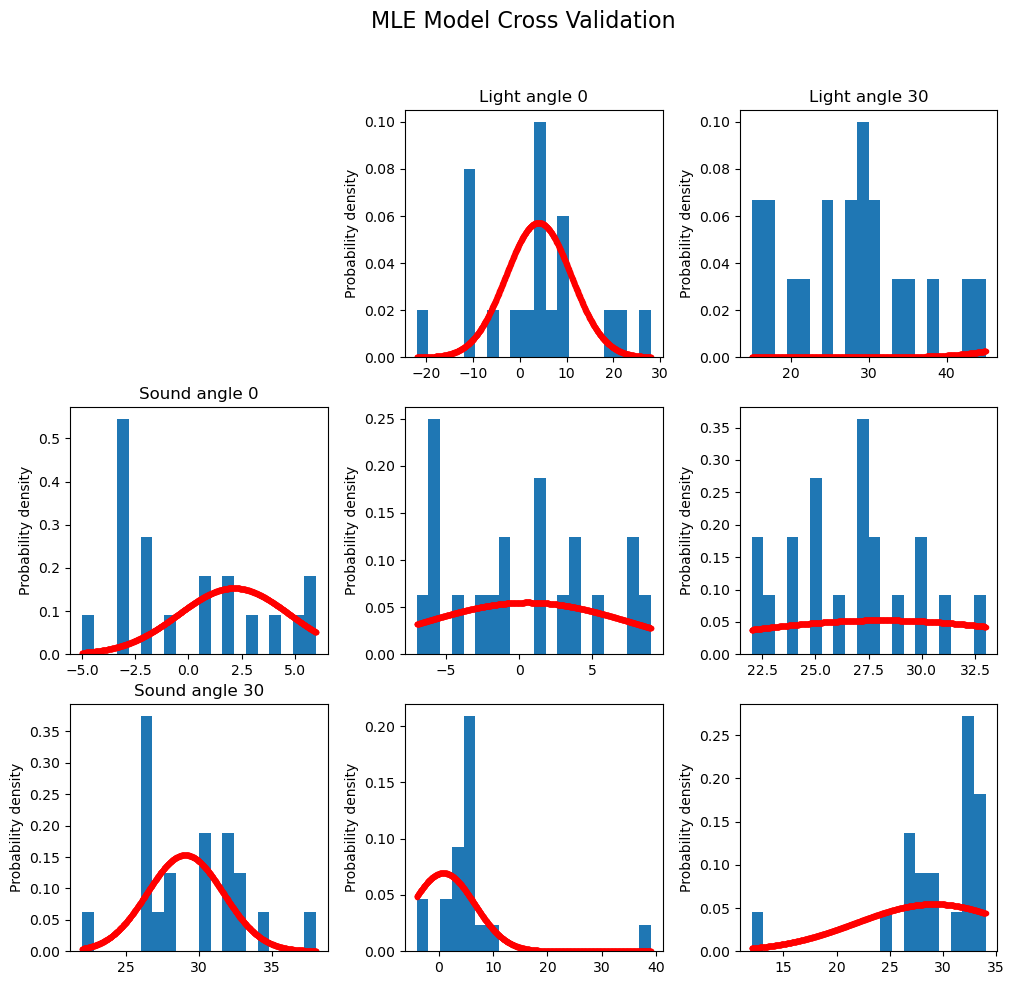

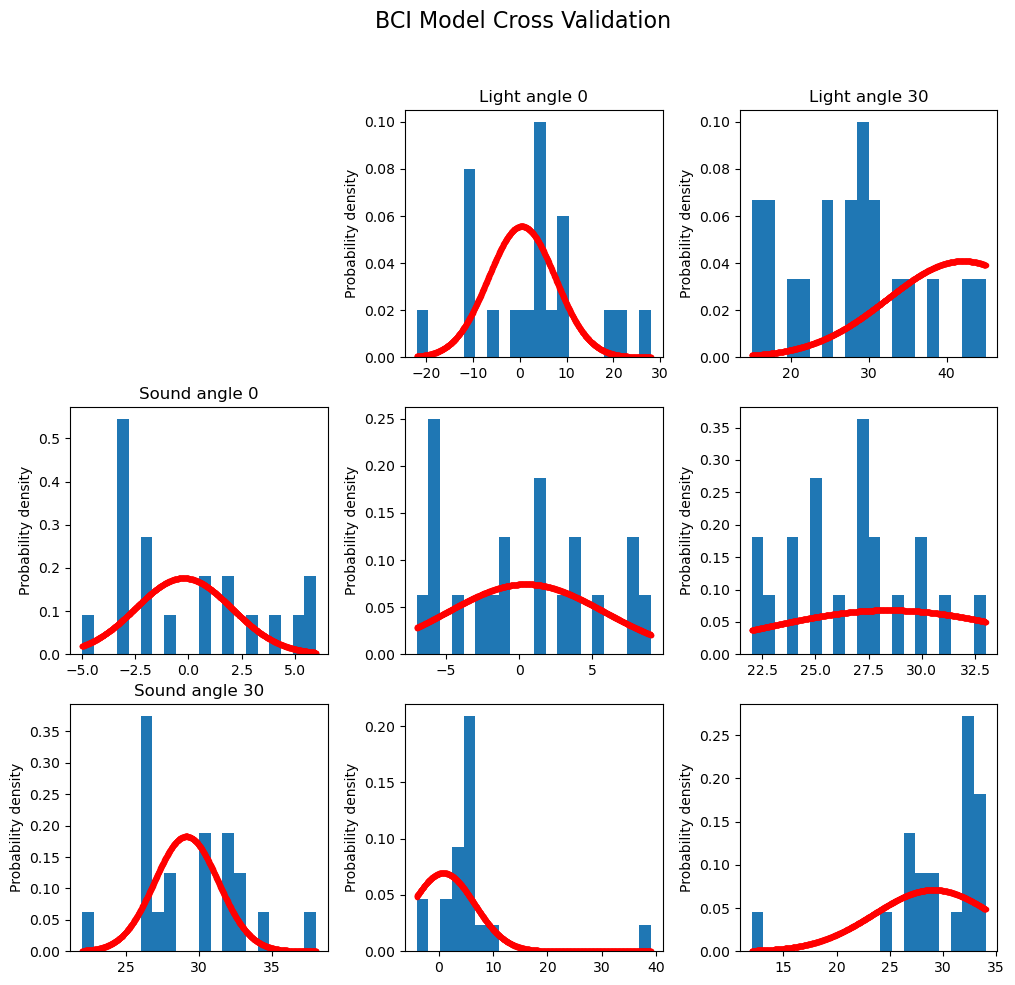

In [35]:
plot_curves_cv(mle_cv_df, "MLE Model Cross Validation")
#print(mle_cv_df)
plot_curves_cv(bci_cv_df, "BCI Model Cross Validation")